# Gaussian Bayes Classifier(non Naive)


In [10]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import multivariate_normal as mvn


In [11]:
#importing the training data
data=pd.read_csv('/content/drive/MyDrive/Classroom/Artificial Mariachi Intelligence/Aldo Cao Romero - MNIST_train.csv')
data.head(5)



,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Observing the data shape
data.shape

(60000, 787)

In [13]:
#Dropping unnecessary columns
data = data.drop(['Unnamed: 0','index'], 1)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#Converting the data into an array and Selecting the columns for the X and y variables
X = data.to_numpy()
y = X[:,0]
X = X[:,1:]/255

In [15]:
#Verifiyin the shape of the data
X.shape

(60000, 784)

In [16]:
y.shape

(60000,)

In [17]:
##Adjusting the sahe of the data into a square matrix of matrices
X_sqrt = np.reshape(X, (60000,28,28))

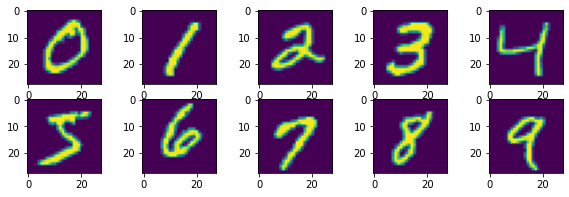

In [18]:
#Plotting some examples of the visulization of the data
plt.figure(figsize=(10,3))
for i in range(10):
  index= np.where(y==i)
  index=index[0][0]
  plt.subplot(2,5,i+1)
  plt.imshow(X_sqrt[index])
 


In [19]:
##Defining the algorithm
class GaussBayes():

  def fit(self, X, y, epsilon=1e-3):

    self.likelihoods = dict()
    self.priors=dict()
    self.K=set(y.astype(int))

    for k in self.K:

      X_k=X[y==k,:]
      N_k, D= X_k.shape
      mu_k = X_k.mean(axis=0)

      self.likelihoods[k]= {'mean':X_k.mean(axis=0), 'cov':(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+epsilon*np.identity(D)}
      self.priors[k]=len(X_k)/len(X)
  def predict(self,X):

    N,D=X.shape
    P_hat = np.zeros((N, len(self.K)))

    for k, l in self.likelihoods.items():
      P_hat[:,k]=mvn.logpdf(X,l['mean'],l['cov'])+np.log(self.priors[k])
    
    return P_hat.argmax(axis=1)


In [20]:
#Fitting and predicting the data
gbayes=GaussBayes()
gbayes.fit(X,y)
y_hat=gbayes.predict(X)

In [21]:
#Defining the accuracy
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

In [22]:
#Getting the accuracy
accuracy(y,y_hat)

0.9306333333333333

In [25]:
#Obteining the Data frame of the prediction and the actual values
results = pd.DataFrame({'Actual': y, 'prediction': y_hat})
results.head(10)

,Actual,prediction
0,5,5
1,0,0
2,4,4
3,1,1
4,9,9
5,2,2
6,1,1
7,3,3
8,1,1
9,4,4


<function matplotlib.pyplot.show>

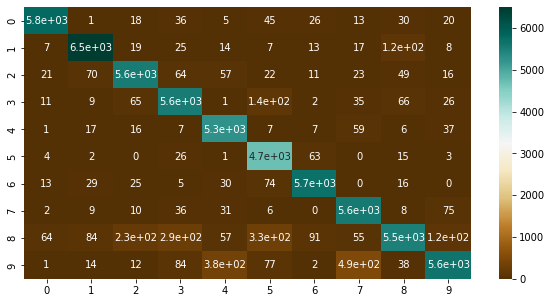

In [27]:
confusion_matrix1=[]
for i in range(0,10):
  b=[]
  for j in range(0,10):
    x=results[(results['Actual']==j)&(results['prediction']==i)].shape[0]
    b.append(x)
  confusion_matrix1.append(b)
plt.figure(figsize=(10,5))
matrix=pd.DataFrame(confusion_matrix1)
sn.heatmap(matrix, cmap="BrBG",annot=True)
plt.show

# Testing


In [3]:
#Importing the testing data
data=pd.read_csv('/content/drive/MyDrive/Classroom/Artificial Mariachi Intelligence/Aldo Cao Romero - MNIST_test.csv')


In [4]:
#Observing the data
data.head(5)

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
t=data.drop(['Unnamed: 0','index'], 1)
X_test = t.to_numpy()
y_test = X_test[:,0]
X_test = X_test[:,1:]/255

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [6]:
#Getting the shape of the data
X_test.shape

(10000, 784)

In [7]:
y_test.shape

(10000,)

In [8]:
#Reshaping the data
X_sqrt_test = np.reshape(X_test, (10000,28,28))

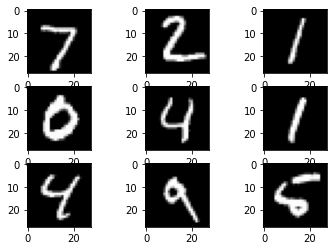

In [32]:
#Showing some examples
for i in range(9):  
  plt.subplot(330 + 1 + i)
  plt.imshow(X_sqrt_test[i], cmap=plt.get_cmap('gray'))


In [24]:
#Fitting and predciting the test data
gbayes_test=GaussBayes()
gbayes_test.fit(X_test,y_test)
y_hat_test=gbayes_test.predict(X_test)

In [25]:
#Getting the accuracy
accuracy(y_test,y_hat_test)

0.9948

In [80]:
#CrEating a data frame for the results
results = pd.DataFrame({'Actual': y_test, 'Predict': y_hat_test})
results.head(10)

,Actual,Predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [60]:
##Creation of the Confusion matrix
confusion_matrix=[]
for i in range(0,10):
  b=[]
  for j in range(0,10):
    x=results[(results['y']==j)&(results['y_pred']==i)].shape[0]
    b.append(x)
  confusion_matrix.append(b)





<function matplotlib.pyplot.show>

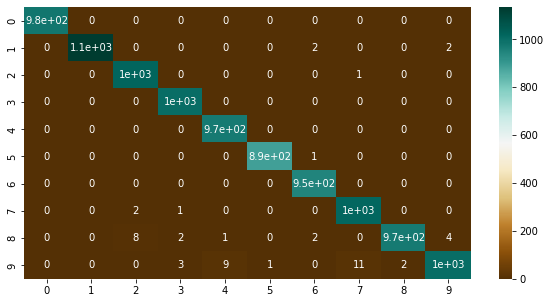

In [28]:
#Heatmap of the confusion matrix
plt.figure(figsize=(10,5))
matrix=pd.DataFrame(confusion_matrix)
sn.heatmap(matrix, cmap="BrBG",annot=True)
plt.show


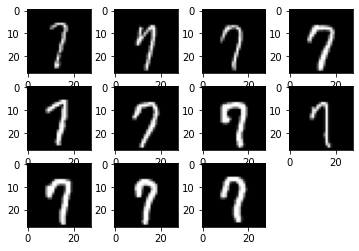

In [77]:
#Analyzing what happen ith the 9 confused with the 4 and 7
index=[]
for idx in results[(results['y']==7)&(results['y_pred']==9)].index:
    index.append(idx)
for i in range(len(index)):  
    plt.subplot(3,4,i+1)
    plt.imshow(X_sqrt_test[index[i]], cmap=plt.get_cmap('gray'))


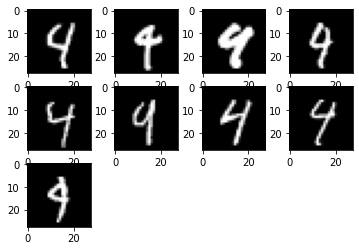

In [78]:
index=[]
for idx in results[(results['y']==4)&(results['y_pred']==9)].index:
    index.append(idx)
for i in range(len(index)):  
    plt.subplot(3,4,i+1)
    plt.imshow(X_sqrt_test[index[i]], cmap=plt.get_cmap('gray'))

# Naive - Bayes


In [ ]:
class GaussNB():

  def fit(self,X,y,epsilon=1e-3):
    self.likelihoods= dict()
    self.priors= dict()

    self.K= set(y.astype(int))

    for k in self.K:
      X_k = X[y==k,:]

      self.likelihoods[k]={'mean':X_k.mean(axis=0), 'cov':X_k.var(axis=0)+epsilon}
      self.priors[k]=len(X_k)/len(X)
  def predict(self,X):

    N, D =X.shape
    P_hat= np.zeros((N, len(self.K)))

    for k ,l in self.likelihoods.items():
      P_hat[:,k] =mvn.logpdf(X, l['mean'], l['cov'])+np.log(self.priors[k])

    return P_hat.argmax(axis=1)


In [ ]:
y

array([5, 0, 4, ..., 5, 6, 8])

In [ ]:
gnb=GaussNB()
gnb.fit(X,y)
y_hat2=gnb.predict(X)

In [ ]:
accuracy(y,y_hat2)

0.7682333333333333

In [ ]:
results = pd.DataFrame({'y': y, 'y_pred': y_hat2})
results.head(10)

,y,y_pred
0,5,3
1,0,0
2,4,4
3,1,1
4,9,9
5,2,2
6,1,1
7,3,3
8,1,1
9,4,4


In [ ]:
###TEST NAIVE-BAYES

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
gnb_test=GaussNB()
gnb_test.fit(X_test,y_test)
y_hat3=gnb.predict(X_test)

In [ ]:
accuracy(y_test,y_hat3)

0.7746

In [ ]:
results = pd.DataFrame({'y': y_test, 'y_pred': y_hat3})
results.head(10)

,y,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,9
5,1,1
6,4,4
7,9,9
8,5,4
9,9,9
